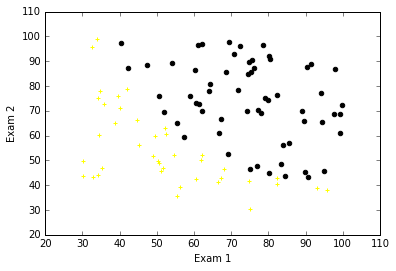

In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data=pd.read_csv("2.txt")
x1=data["Exam 1"]
x2=data["Exam 2"]
cols=data.shape[1]
y=np.array(data['cls'])
m=x1.size
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
for i in range(0, m):
        if y[i]==0.0:
            plt.scatter(x1[i],x2[i],marker="+",color="yellow",label="Not Admitted")
        elif y[i]==1.0:
            plt.scatter(x1[i],x2[i],color="black",label="Admitted")
plt.show()

In [94]:
x0=np.ones(m)
X=np.array([x0,x1,x2]).T



In [14]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))
    

In [9]:
def cost(theta,X,y):
    
    h=sigmoid(X.dot(theta))
    return ((-y * np.log(h) - (1 - y) * np.log(1 - h)).mean())
    

In [10]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(theta.size)
    error = sigmoid(X * theta.T) - y
    for i in range(theta.size):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [227]:
print "the initial cost is",cost(theta,X,y)
init_grad=gradient(theta, X, y)
print "the  gradient is",init_grad

the initial cost is 0.69314718056
the  gradient is [ -0.1        -12.00921659 -11.26284221]


In [108]:
print "the coefficients are",gradient_descent(X,y,theta)

the coefficients are [-22.27070873   0.63394463   0.3360934 ]


In [147]:
def gradient_descent(X,y):
    theta=np.zeros(X.shape[1])
    num_iter=100000
    cost_hist=np.zeros(num_iter)
    alpha=0.001
    for i in range(num_iter):
#         z = np.dot(X,theta.T)
#         h = sigmoid(z)
#         g=X.T.dot(h - y) / y.size
            z = np.dot(X,theta)
            h = sigmoid(z)
            gr = np.dot(X.T, (h - y)) / y.size
            theta -= alpha * gr
            cost_hist[i]=cost(theta,X,y)
    return theta,cost_hist

In [151]:
fnal,hist=gradient_descent(X,y)
print "the final parameters are ",fnal

the final parameters are  [-4.81180027  0.04528064  0.03819149]


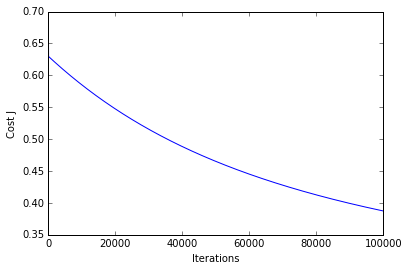

In [149]:

plt.plot(hist)
plt.ylabel('Cost J')
plt.xlabel('Iterations')